In [1]:
#import libraries and load the datasets
import pandas as pd
train_df1= pd.read_csv('train.csv')
test_df2= pd.read_csv('test.csv')
meal_df3= pd.read_csv('meal_info.csv')
fc_df4= pd.read_csv('fulfilment_center_info.csv')

In [2]:
# head of fulfilment_center_info file
fc_df4.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [3]:
print("Shape of fulfilment_center_info :", fc_df4.shape)

Shape of fulfilment_center_info : (77, 5)


In [4]:
# NaN values in fulfilment_center_info
fc_df4.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [5]:
# head of meal_info file
meal_df3.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [6]:
print("Shape of meal_info: ", meal_df3.shape)

Shape of meal_info:  (51, 3)


In [7]:
# NaN values in meal_info
meal_df3.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [8]:
# Head of Train file (historical demand data)
train_df1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [9]:
print("Shape of train: ", train_df1.shape)

Shape of train:  (456548, 9)


In [10]:
# NaN values in train data
train_df1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [11]:
# Head of Test data
test_df2.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In [12]:
print("Shape of Test: ", test_df2.shape)

Shape of Test:  (32573, 8)


In [13]:
# NaN values in test data
test_df2.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

# FULFILMENT CENTER INFO

In [14]:
print("* Total number of centers : ", fc_df4['center_id'].nunique())


* Total number of centers :  77


In [15]:
print("* Types of centers :")
print(fc_df4['center_type'].unique())

* Types of centers :
['TYPE_A' 'TYPE_B' 'TYPE_C']


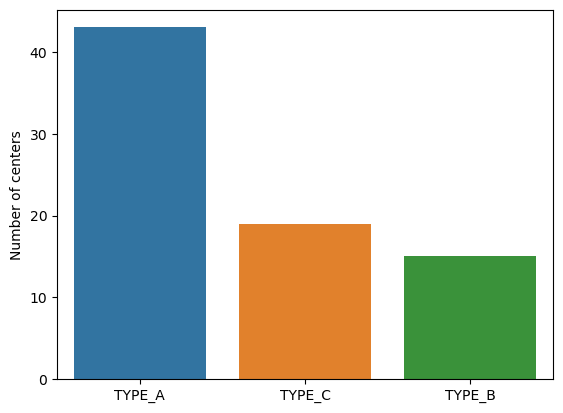

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use value_counts to get counts of each category
center_type_counts = fc_df4['center_type'].value_counts()

# Create a count plot using the counts
ax = sns.barplot(x=center_type_counts.index, y=center_type_counts)
ax.set(ylabel='Number of centers')
plt.show()


In [17]:
print("Total Number of cities: ", fc_df4['city_code'].nunique())

Total Number of cities:  51


In [18]:
print("Total number of regions: ", fc_df4['region_code'].nunique())

Total number of regions:  8


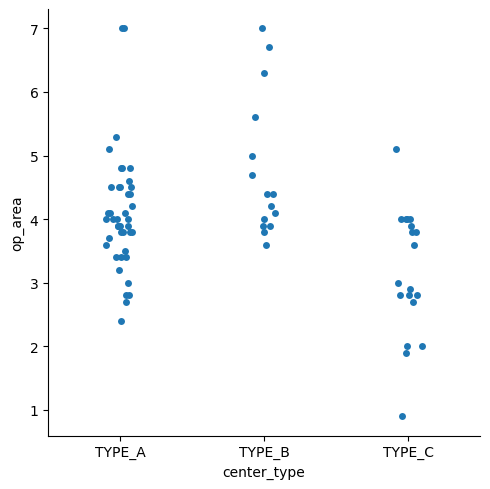

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.catplot(x = 'center_type', y = 'op_area', data=fc_df4)
plt.show()

In [20]:
fc_df4['region_code'] = fc_df4['city_code'].astype(str) + "_" + fc_df4['region_code'].astype(str)
fc_df4['region_code'].nunique()

51

so in the one city there is not any centers which are in different regions. so maybe region code will not be helpful.


In [21]:
fc_df4.drop('region_code', axis=1, inplace=True)

# MEAL INFO

In [22]:
print("Total number of different types of meal: ", meal_df3['meal_id'].nunique())

Total number of different types of meal:  51


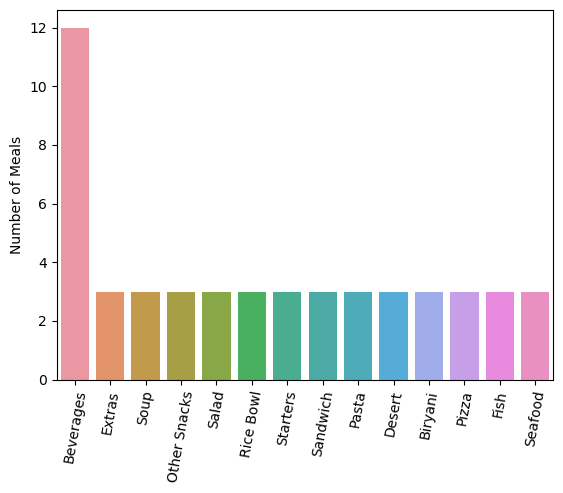

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use value_counts to get counts of each category
category_counts = meal_df3['category'].value_counts()

# Create a count plot using the counts
ax = sns.barplot(x=category_counts.index, y=category_counts)
ax.set(ylabel='Number of Meals')
plt.xticks(rotation=80)
plt.show()


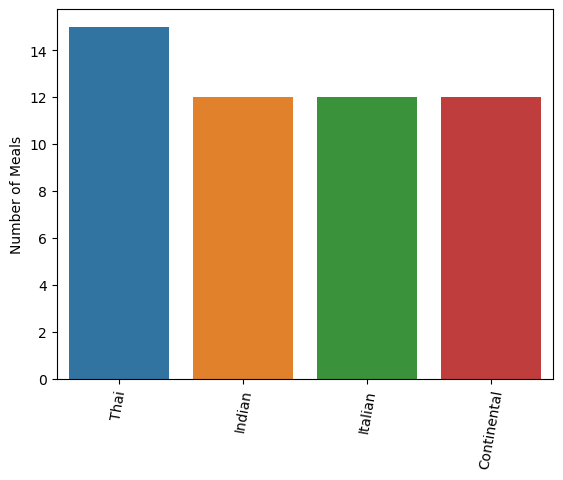

In [24]:

# Use value_counts to get counts of each cuisine
cuisine_counts = meal_df3['cuisine'].value_counts()

# Create a count plot using the counts
ax = sns.barplot(x=cuisine_counts.index, y=cuisine_counts)
ax.set(ylabel='Number of Meals')
plt.xticks(rotation=80)
plt.show()


In [25]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = meal_df3['category'], hue=meal_df3['cuisine'], ax=ax)
plt.show()

In [26]:
train_df1 = pd.merge(train_df1, fc_df4, on='center_id')
test_df2 = pd.merge(test_df2, fc_df4, on='center_id')

train_df1 = pd.merge(train_df1, meal_df3, on='meal_id')
test_df2 = pd.merge(test_df2, meal_df3, on='meal_id')

In [27]:
train_df1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         323        647   
2                      0                  0          96        647   
3                      0                  0         163        647   
4                      0                  0         215        647   

  center_type  op_area   category cuisine  
0      TYPE_C      2.0  Beverages    Thai  
1      TYPE_C      2.0  Beverages    Thai  
2      TYPE_C      2.0  Beverages    Thai  
3      TYPE_C      2.0  Beverages    Thai  
4      TYPE_C      2.0  Beverages    Thai

In [28]:
c_m_tr = (train_df1['center_id'].astype(str) + "_" + train_df1['meal_id'].astype(str)).unique()
print("there are ", len(c_m_tr), " center-meal pairs in train data")

there are  3597  center-meal pairs in train data


In [29]:
c_m_te = (test_df2['center_id'].astype(str) + "_" + test_df2['meal_id'].astype(str)).unique()
print("there are ", len(c_m_te), " center-meal pairs in test data")

there are  3548  center-meal pairs in test data


In [30]:
# check if test set has any new center-mean pair or not
print("There are ", len(set(c_m_te) - set(c_m_tr)), " new center-meal pairs in test dataset which are not present in train dataset")
print(set(c_m_te) - set(c_m_tr))

There are  3  new center-meal pairs in test dataset which are not present in train dataset
{'73_2956', '92_2104', '73_1571'}


In [31]:
test_df2[(test_df2['center_id']==73) & (test_df2['meal_id'].isin([2956, 1571]))].shape[0]

11

In [32]:
test_df2[(test_df2['center_id']==92) & (test_df2['meal_id'].isin([2104]))].shape[0]

2

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.


In [33]:
train_df1['b_c_p_diff'] = train_df1['base_price'] - train_df1['checkout_price']

In [34]:
test_df2['b_c_p_diff'] = test_df2['base_price'] - test_df2['checkout_price']

In [35]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
 14  b_c_p_diff             456548 non-nu

In [36]:
train_df1.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
center_type                   3
op_area                      30
category                     14
cuisine                       4
b_c_p_diff                 5168
dtype: int64

In [37]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   center_type            32573 non-null  object 
 10  op_area                32573 non-null  float64
 11  category               32573 non-null  object 
 12  cuisine                32573 non-null  object 
 13  b_c_p_diff             32573 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 3.7+ 

In [38]:
test_df2.nunique()

id                       32573
week                        10
center_id                   77
meal_id                     51
checkout_price            1397
base_price                1179
emailer_for_promotion        2
homepage_featured            2
city_code                   51
center_type                  3
op_area                     30
category                    14
cuisine                      4
b_c_p_diff                1728
dtype: int64

In [39]:
train_df1['id'].duplicated().sum()

0

In [40]:
test_df2['id'].duplicated().sum()

0

<Axes: >

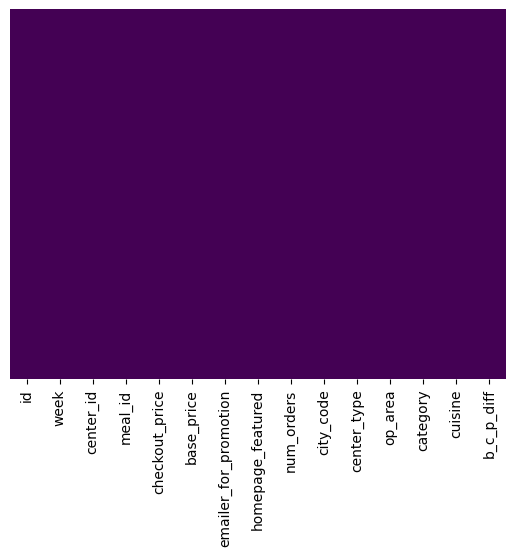

In [41]:
#for checking null values

sns.heatmap(train_df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

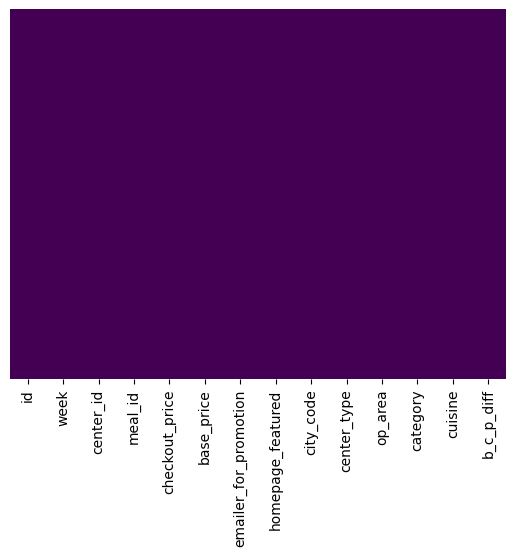

In [42]:
#for checking null values

sns.heatmap(test_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
train_df1.corr()

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\3604830810.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df1.corr()


id      week  center_id   meal_id  \
id                     1.000000  0.002225   0.002641  0.000488   
week                   0.002225  1.000000  -0.003450  0.019814   
center_id              0.002641 -0.003450   1.000000  0.009893   
meal_id                0.000488  0.019814   0.009893  1.000000   
checkout_price         0.001941  0.026581   0.001348  0.010748   
base_price             0.002909  0.028614   0.000604  0.002605   
emailer_for_promotion  0.002001 -0.000841   0.013658  0.013402   
homepage_featured      0.003111 -0.008263  -0.005043  0.016354   
num_orders             0.000702 -0.017210  -0.053035  0.010597   
city_code             -0.000387  0.000405   0.061078 -0.003198   
op_area               -0.000090  0.001550  -0.111869 -0.001546   
b_c_p_diff             0.003520  0.010997  -0.002247 -0.025262   

                       checkout_price  base_price  emailer_for_promotion  \
id                           0.001941    0.002909               0.002001   
week                         0.026581    0.028614              -0.000841   
center_id                    0.001348    0.000604               0.013658   
meal_id                      0.010748    0.002605               0.013402   
checkout_price               1.000000    0.953389               0.004818   
base_price                   0.953389    1.000000               0.171173   
emailer_for_promotion        0.004818    0.171173               1.000000   
homepage_featured           -0.057184    0.057156               0.390534   
num_orders                  -0.282108   -0.222306               0.277147   
city_code                   -0.004805   -0.002054              -0.005234   
op_area                      0.021569    0.018031              -0.019462   
b_c_p_diff                   0.005878    0.307343               0.552075   

                       homepage_featured  num_orders  city_code   op_area  \
id                              0.003111    0.000702  -0.000387 -0.000090   
week                           -0.008263   -0.017210   0.000405  0.001550   
center_id                      -0.005043   -0.053035   0.061078 -0.111869   
meal_id                         0.016354    0.010597  -0.003198 -0.001546   
checkout_price                 -0.057184   -0.282108  -0.004805  0.021569   
base_price                      0.057156   -0.222306  -0.002054  0.018031   
emailer_for_promotion           0.390534    0.277147  -0.005234 -0.019462   
homepage_featured               1.000000    0.294490   0.008640  0.041498   
num_orders                      0.294490    1.000000   0.041596  0.176976   
city_code                       0.008640    0.041596   1.000000  0.131476   
op_area                         0.041498    0.176976   0.131476  1.000000   
b_c_p_diff                      0.369758    0.152950   0.008345 -0.008267   

                       b_c_p_diff  
id                       0.003520  
week                     0.010997  
center_id               -0.002247  
meal_id                 -0.025262  
checkout_price           0.005878  
base_price               0.307343  
emailer_for_promotion    0.552075  
homepage_featured        0.369758  
num_orders               0.152950  
city_code                0.008345  
op_area                 -0.008267  
b_c_p_diff               1.000000

In [44]:
test_df2.corr()

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\3183706837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df2.corr()


id      week  center_id   meal_id  \
id                     1.000000  0.011176   0.008868 -0.002242   
week                   0.011176  1.000000  -0.001295  0.003320   
center_id              0.008868 -0.001295   1.000000  0.008715   
meal_id               -0.002242  0.003320   0.008715  1.000000   
checkout_price        -0.012404  0.014100  -0.002326  0.043286   
base_price            -0.010621 -0.012672  -0.005593  0.031053   
emailer_for_promotion  0.000697 -0.028666   0.008064 -0.032147   
homepage_featured     -0.002035 -0.039336  -0.005855  0.002107   
city_code             -0.000612 -0.002964   0.060390 -0.004580   
op_area               -0.000812  0.000876  -0.108784 -0.004708   
b_c_p_diff             0.006632 -0.105042  -0.012950 -0.046822   

                       checkout_price  base_price  emailer_for_promotion  \
id                          -0.012404   -0.010621               0.000697   
week                         0.014100   -0.012672              -0.028666   
center_id                   -0.002326   -0.005593               0.008064   
meal_id                      0.043286    0.031053              -0.032147   
checkout_price               1.000000    0.967567               0.026338   
base_price                   0.967567    1.000000               0.179885   
emailer_for_promotion        0.026338    0.179885               1.000000   
homepage_featured           -0.048799    0.043210               0.460819   
city_code                   -0.003050   -0.000027              -0.003497   
op_area                      0.039577    0.036198              -0.020838   
b_c_p_diff                  -0.095894    0.158667               0.605871   

                       homepage_featured  city_code   op_area  b_c_p_diff  
id                             -0.002035  -0.000612 -0.000812    0.006632  
week                           -0.039336  -0.002964  0.000876   -0.105042  
center_id                      -0.005855   0.060390 -0.108784   -0.012950  
meal_id                         0.002107  -0.004580 -0.004708   -0.046822  
checkout_price                 -0.048799  -0.003050  0.039577   -0.095894  
base_price                      0.043210  -0.000027  0.036198    0.158667  
emailer_for_promotion           0.460819  -0.003497 -0.020838    0.605871  
homepage_featured               1.000000   0.000080  0.028240    0.360988  
city_code                       0.000080   1.000000  0.132644    0.011815  
op_area                         0.028240   0.132644  1.000000   -0.012051  
b_c_p_diff                      0.360988   0.011815 -0.012051    1.000000

Our output (target) variable is num_orders

If we see correlation with it, main features which has high correlation are:

Checkout_price

base_price

Emailer_promotion

Homepage_freatured

Op_area

Let’s se all features comparison.

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\19674740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df1.corr(),annot=True)


<Axes: >

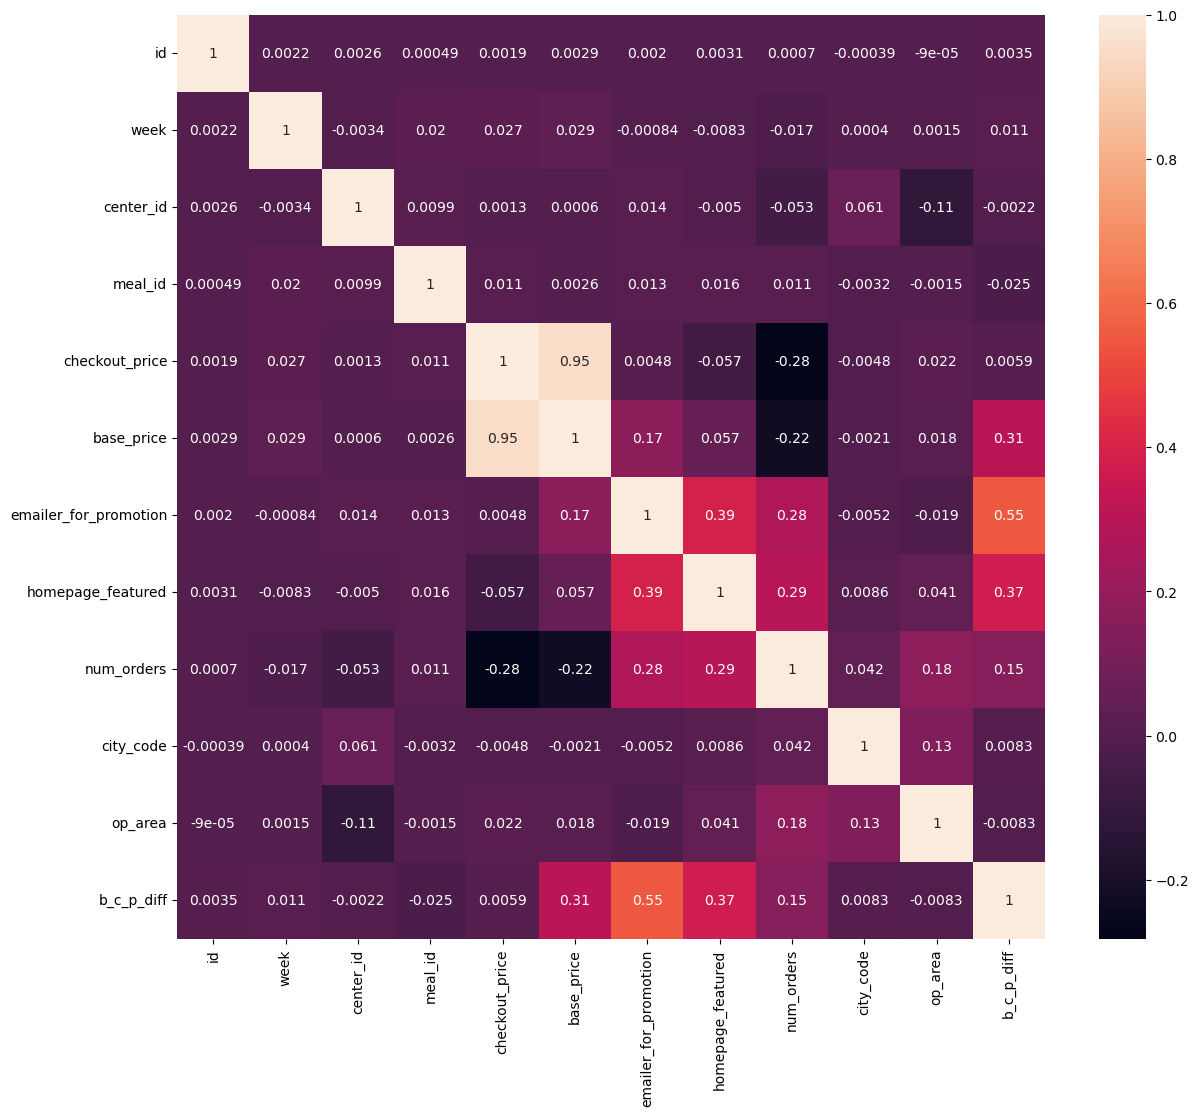

In [45]:
plt.figure(figsize=(14,12))
sns.heatmap(train_df1.corr(),annot=True)

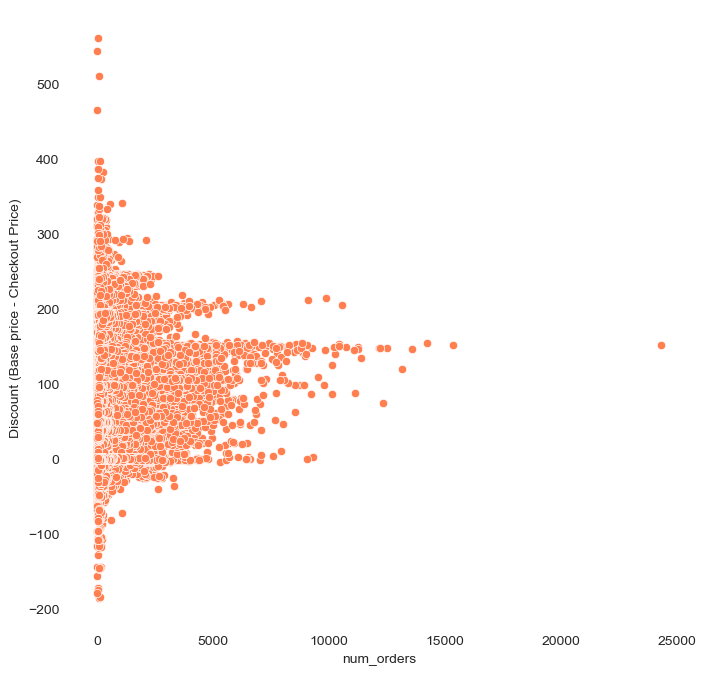

In [46]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train_df1['base_price']-train_df1['checkout_price'],x=train_df1['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

<Axes: >

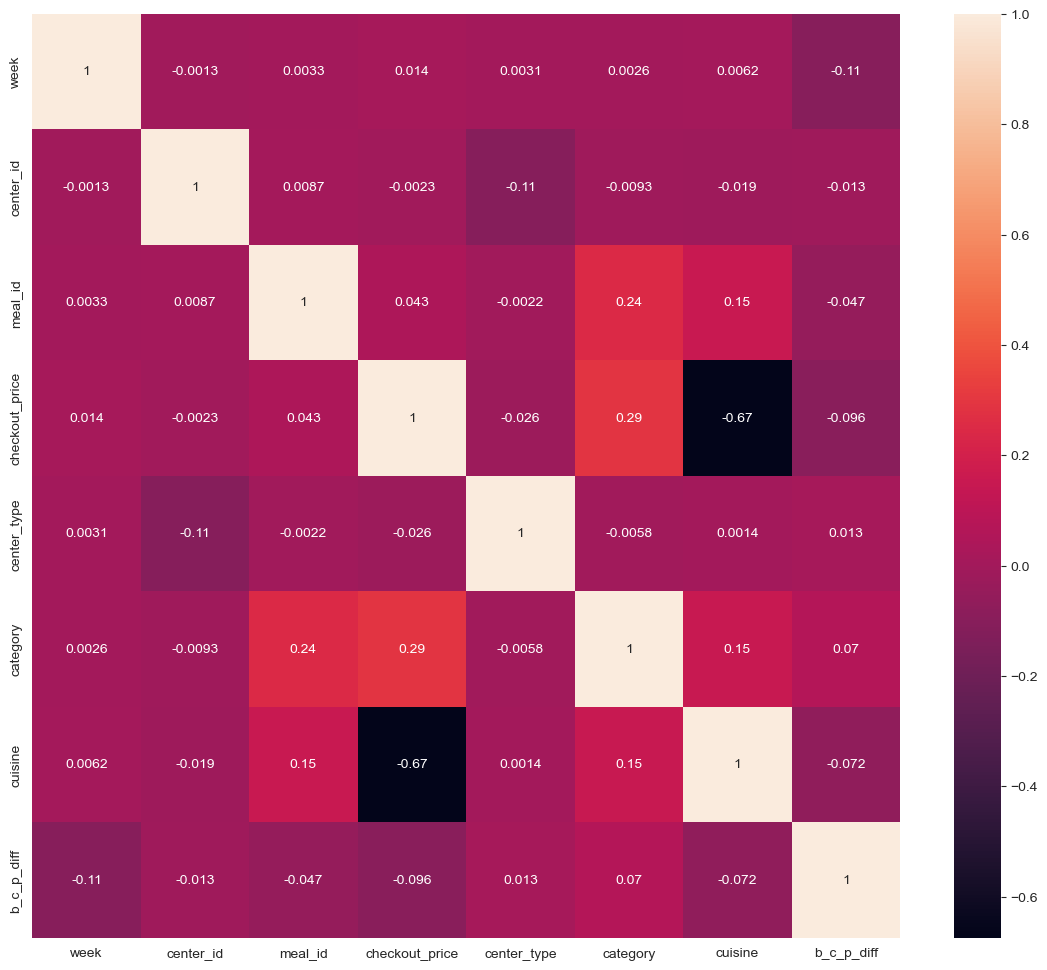

In [109]:
plt.figure(figsize=(14,12))
sns.heatmap(test_df2.corr(),annot=True)

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\3466227884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['num_orders'])


<Axes: xlabel='num_orders', ylabel='Density'>

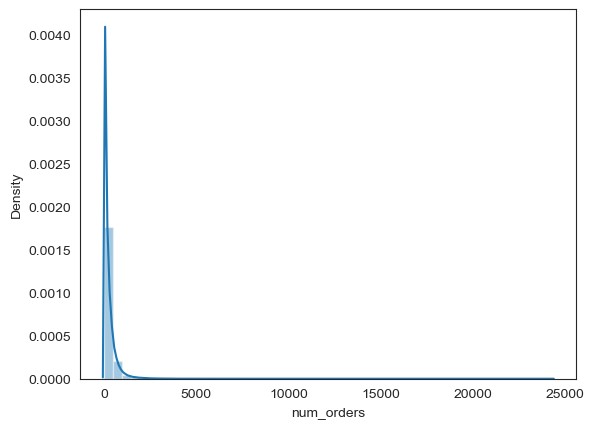

In [48]:
sns.distplot(train_df1['num_orders'])
#here it is +ve skewed and here according to pdf max values are from 0 to 2000

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\2929623506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['center_id'],kde=True)


<Axes: xlabel='center_id', ylabel='Density'>

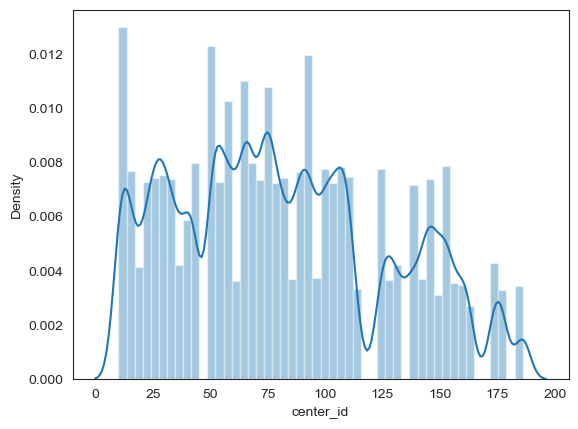

In [49]:
sns.distplot(train_df1['center_id'],kde=True)

In [50]:
sns.distplot(train_df1['week'],kde=True)

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\1534661279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['week'],kde=True)


<Axes: xlabel='week', ylabel='Density'>

If we see week column. In some weeks (i.e 22,44,66,88,12) we are getting very less orders compared to other . This means after some weeks they are getting less orders. Maximum weeks they are getting less than 5000.

In [51]:
sns.distplot(train_df1['meal_id'],kde=True)

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\574037002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['meal_id'],kde=True)


<Axes: xlabel='meal_id', ylabel='Density'>

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\1448014594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['checkout_price'],kde=True)


<Axes: xlabel='checkout_price', ylabel='Density'>

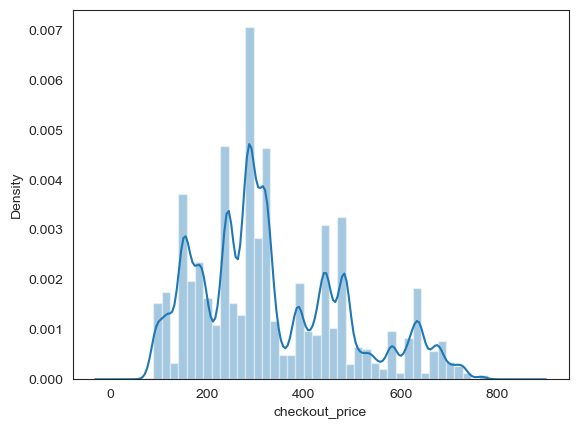

In [52]:
sns.distplot(train_df1['checkout_price'],kde=True)

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\3523443301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['base_price'],kde=True)


<Axes: xlabel='base_price', ylabel='Density'>

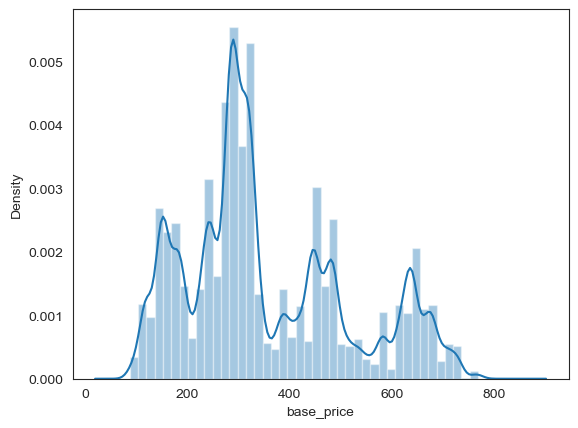

In [53]:
sns.distplot(train_df1['base_price'],kde=True)

C:\Users\Rusa\AppData\Local\Temp\ipykernel_6696\1610435592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df1['city_code'],kde=True)


<Axes: xlabel='city_code', ylabel='Density'>

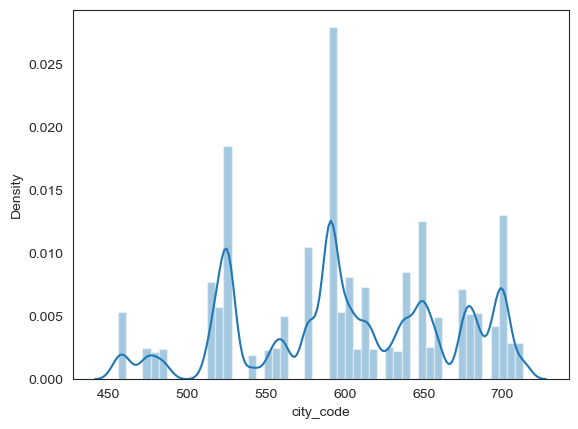

In [54]:
sns.distplot(train_df1['city_code'],kde=True)

<Axes: xlabel='emailer_for_promotion', ylabel='num_orders'>

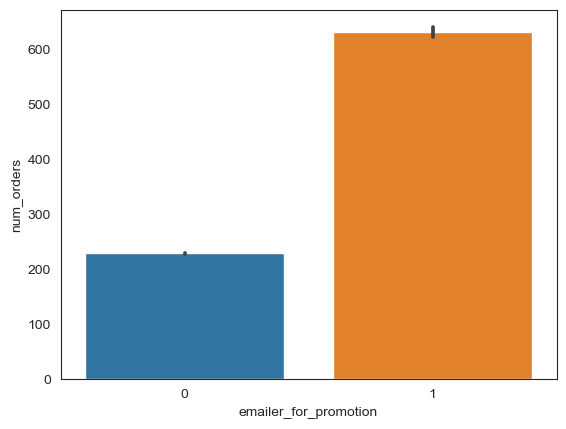

In [55]:
#relation between num_orders and emailer_for_promotion....
#this shows if the mail has sent there are more no of orders
sns.barplot(x = 'emailer_for_promotion',y = 'num_orders',data =train_df1)

<Axes: xlabel='homepage_featured', ylabel='num_orders'>

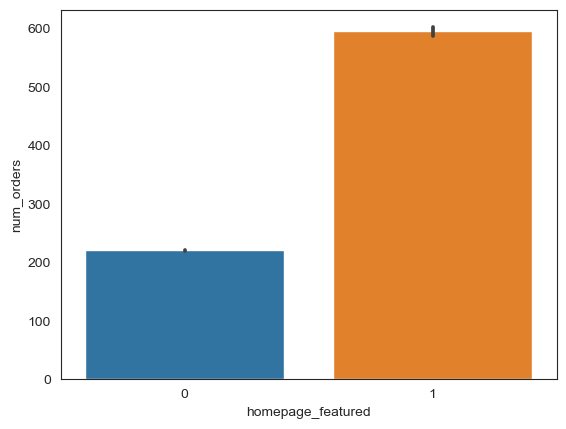

In [56]:
sns.barplot(x = 'homepage_featured',y = 'num_orders',data =train_df1)

<Axes: xlabel='category', ylabel='num_orders'>

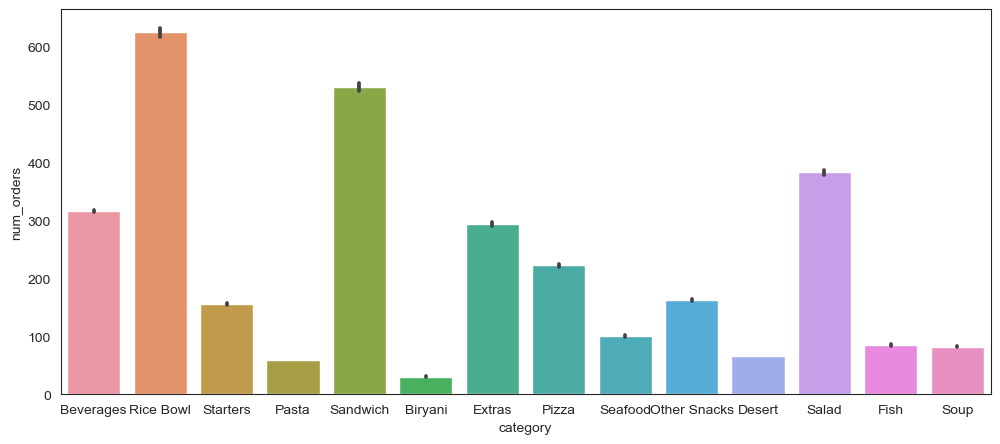

In [57]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'category',y = 'num_orders',data =train_df1)


<Axes: xlabel='cuisine', ylabel='num_orders'>

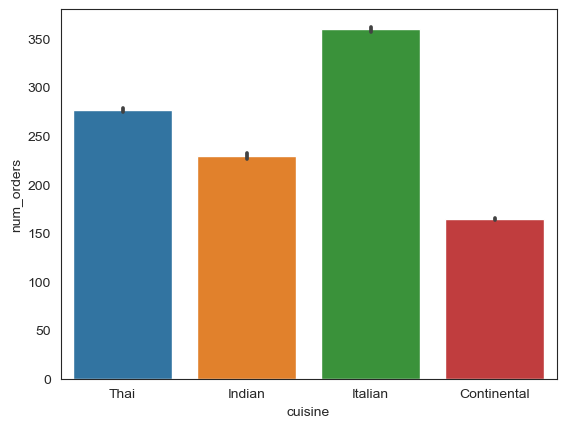

In [58]:
sns.barplot(x = 'cuisine',y = 'num_orders',data =train_df1)

<Axes: xlabel='center_type', ylabel='num_orders'>

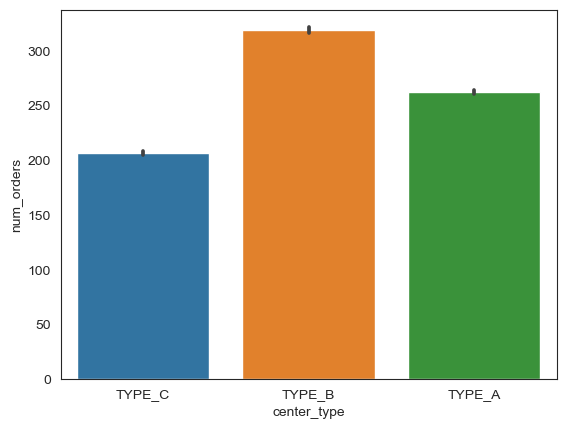

In [59]:
sns.barplot(x = 'center_type',y = 'num_orders',data =train_df1)

<Axes: xlabel='op_area', ylabel='num_orders'>

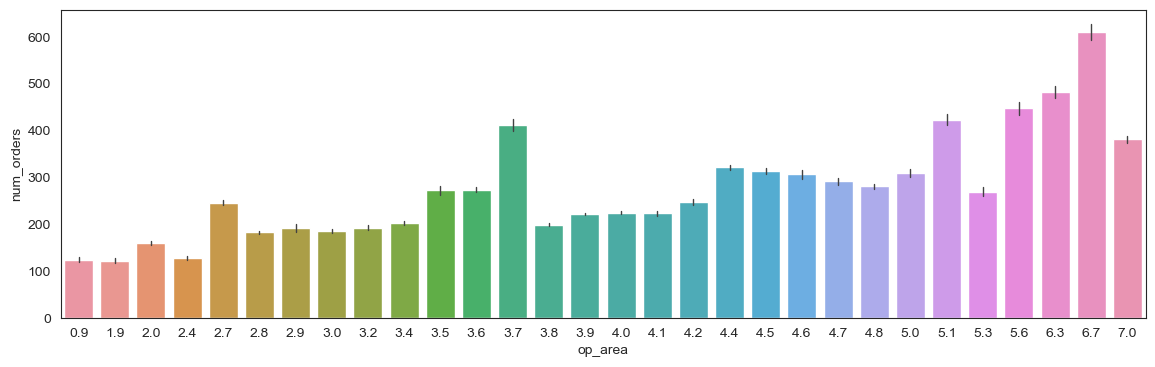

In [60]:
plt.figure(figsize=(14,4))
sns.barplot(x = 'op_area',y = 'num_orders',data =train_df1,errwidth = 1)

# FEATURE ENGINEERING

In [61]:
#for checking outliers
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [62]:
a=train_df1['base_price']
a

0         152.29
1         152.29
2         133.92
3         134.86
4         147.50
           ...  
456543    630.53
456544    582.03
456545    581.03
456546    581.03
456547    582.03
Name: base_price, Length: 456548, dtype: float64

In [63]:
A=test_df2['base_price']
A

0        159.11
1        159.11
2        158.14
3        157.14
4        159.11
          ...  
32568    581.03
32569    582.03
32570    629.53
32571    629.53
32572    631.53
Name: base_price, Length: 32573, dtype: float64

In [64]:
b=train_df1['checkout_price']
c=train_df1['num_orders']

In [65]:
import numpy as np
detect_outliers(a)

[866.27, 865.27, 864.27, 865.27, 866.27, 866.27, 865.27, 865.27]

In [66]:
detect_outliers(b)

[866.27, 865.27, 864.27, 865.27, 866.27, 866.27, 865.27, 865.27, 866.27]

In [67]:
detect_outliers(c)

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1471,
 1608,
 1837,
 1513,
 1607,
 1594,
 1485,
 1486,
 2039,
 1540,
 1768,
 2187,
 1579,
 1552,
 1797,
 1755,
 1565,
 2039,
 1822,
 2121,
 2377,
 2753,
 2823,
 2660,
 2174,
 2227,
 1606,
 1769,
 1890,
 2078,
 1890,
 2105,
 1675,
 1889,
 2012,
 1756,
 1567,
 1673,
 1781,
 2066,
 1863,
 1863,
 2134,
 2186,
 1997,
 2186,
 2053,
 1863,
 1863,
 1985,
 1581,
 1566,
 2159,
 2038,
 1620,
 1660,
 1796,
 1500,
 1986,
 1473,
 1458,
 1715,
 1486,
 1485,
 1472,
 1635,
 2080,
 1634,
 1700,
 1539,
 1716,
 1565,
 1702,
 1742,
 1727,
 1754,
 1539,
 1621,
 1621,
 1540,
 1862,
 1727,
 1459,
 2132,
 1891,
 2067,
 2472,
 1863,
 1972,
 2106,
 2146,
 1998,
 2511,
 2

In [68]:
B=test_df2['checkout_price']


In [69]:
detect_outliers(A)

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1471,
 1608,
 1837,
 1513,
 1607,
 1594,
 1485,
 1486,
 2039,
 1540,
 1768,
 2187,
 1579,
 1552,
 1797,
 1755,
 1565,
 2039,
 1822,
 2121,
 2377,
 2753,
 2823,
 2660,
 2174,
 2227,
 1606,
 1769,
 1890,
 2078,
 1890,
 2105,
 1675,
 1889,
 2012,
 1756,
 1567,
 1673,
 1781,
 2066,
 1863,
 1863,
 2134,
 2186,
 1997,
 2186,
 2053,
 1863,
 1863,
 1985,
 1581,
 1566,
 2159,
 2038,
 1620,
 1660,
 1796,
 1500,
 1986,
 1473,
 1458,
 1715,
 1486,
 1485,
 1472,
 1635,
 2080,
 1634,
 1700,
 1539,
 1716,
 1565,
 1702,
 1742,
 1727,
 1754,
 1539,
 1621,
 1621,
 1540,
 1862,
 1727,
 1459,
 2132,
 1891,
 2067,
 2472,
 1863,
 1972,
 2106,
 2146,
 1998,
 2511,
 2

In [70]:
detect_outliers(B)

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1471,
 1608,
 1837,
 1513,
 1607,
 1594,
 1485,
 1486,
 2039,
 1540,
 1768,
 2187,
 1579,
 1552,
 1797,
 1755,
 1565,
 2039,
 1822,
 2121,
 2377,
 2753,
 2823,
 2660,
 2174,
 2227,
 1606,
 1769,
 1890,
 2078,
 1890,
 2105,
 1675,
 1889,
 2012,
 1756,
 1567,
 1673,
 1781,
 2066,
 1863,
 1863,
 2134,
 2186,
 1997,
 2186,
 2053,
 1863,
 1863,
 1985,
 1581,
 1566,
 2159,
 2038,
 1620,
 1660,
 1796,
 1500,
 1986,
 1473,
 1458,
 1715,
 1486,
 1485,
 1472,
 1635,
 2080,
 1634,
 1700,
 1539,
 1716,
 1565,
 1702,
 1742,
 1727,
 1754,
 1539,
 1621,
 1621,
 1540,
 1862,
 1727,
 1459,
 2132,
 1891,
 2067,
 2472,
 1863,
 1972,
 2106,
 2146,
 1998,
 2511,
 2

<Axes: ylabel='base_price'>

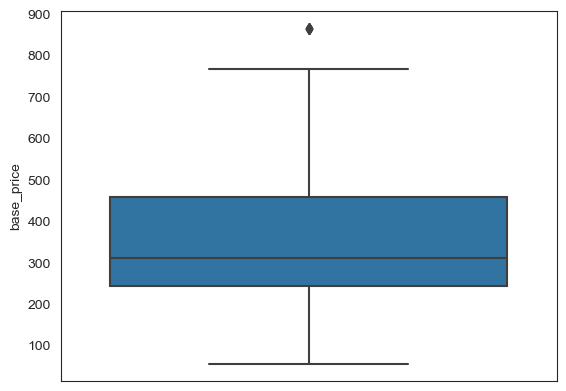

In [71]:
sns.boxplot(y = 'base_price', data = train_df1)

<Axes: ylabel='base_price'>

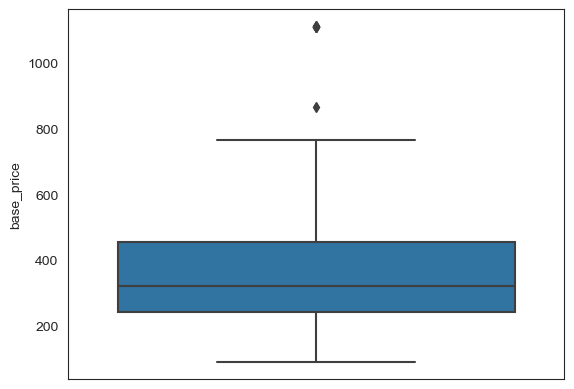

In [72]:
sns.boxplot(y = 'base_price', data = test_df2)

<Axes: ylabel='checkout_price'>

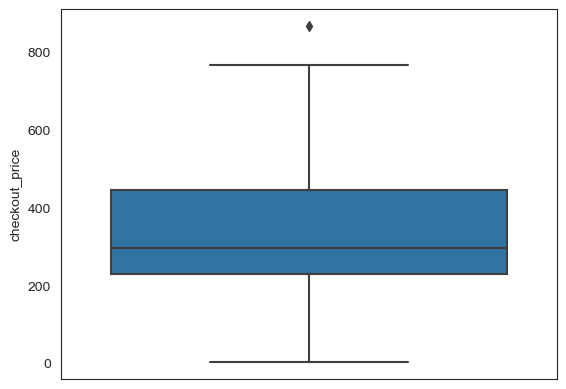

In [73]:
sns.boxplot(y = 'checkout_price', data = train_df1)

<Axes: ylabel='checkout_price'>

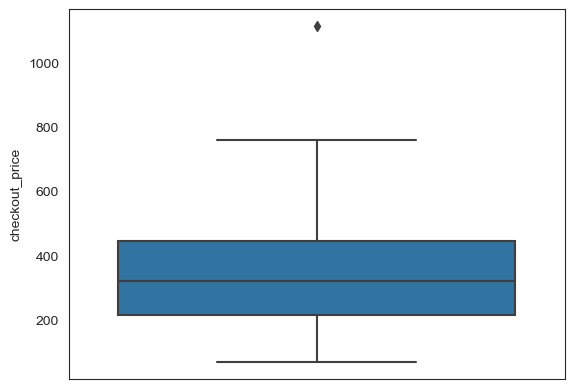

In [74]:
sns.boxplot(y = 'checkout_price', data = test_df2)

In [75]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
 14  b_c_p_diff             456548 non-nu

In [76]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   center_type            32573 non-null  object 
 10  op_area                32573 non-null  float64
 11  category               32573 non-null  object 
 12  cuisine                32573 non-null  object 
 13  b_c_p_diff             32573 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 3.7+ 

# ENCODING

In [77]:
#using label encoding
categ = ['category', 'cuisine','center_type']
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
train_df1[categ] = train_df1[categ].apply(le.fit_transform)

In [78]:
#using label encoding
categ = ['category', 'cuisine','center_type']
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
test_df2[categ] = test_df2[categ].apply(le.fit_transform)

In [79]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  int32  
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  int32  
 13  cuisine                456548 non-null  int32  
 14  b_c_p_diff             456548 non-nu

In [80]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   center_type            32573 non-null  int32  
 10  op_area                32573 non-null  float64
 11  category               32573 non-null  int32  
 12  cuisine                32573 non-null  int32  
 13  b_c_p_diff             32573 non-null  float64
dtypes: float64(4), int32(3), int64(7)
memory usage: 3.4 MB

<Axes: >

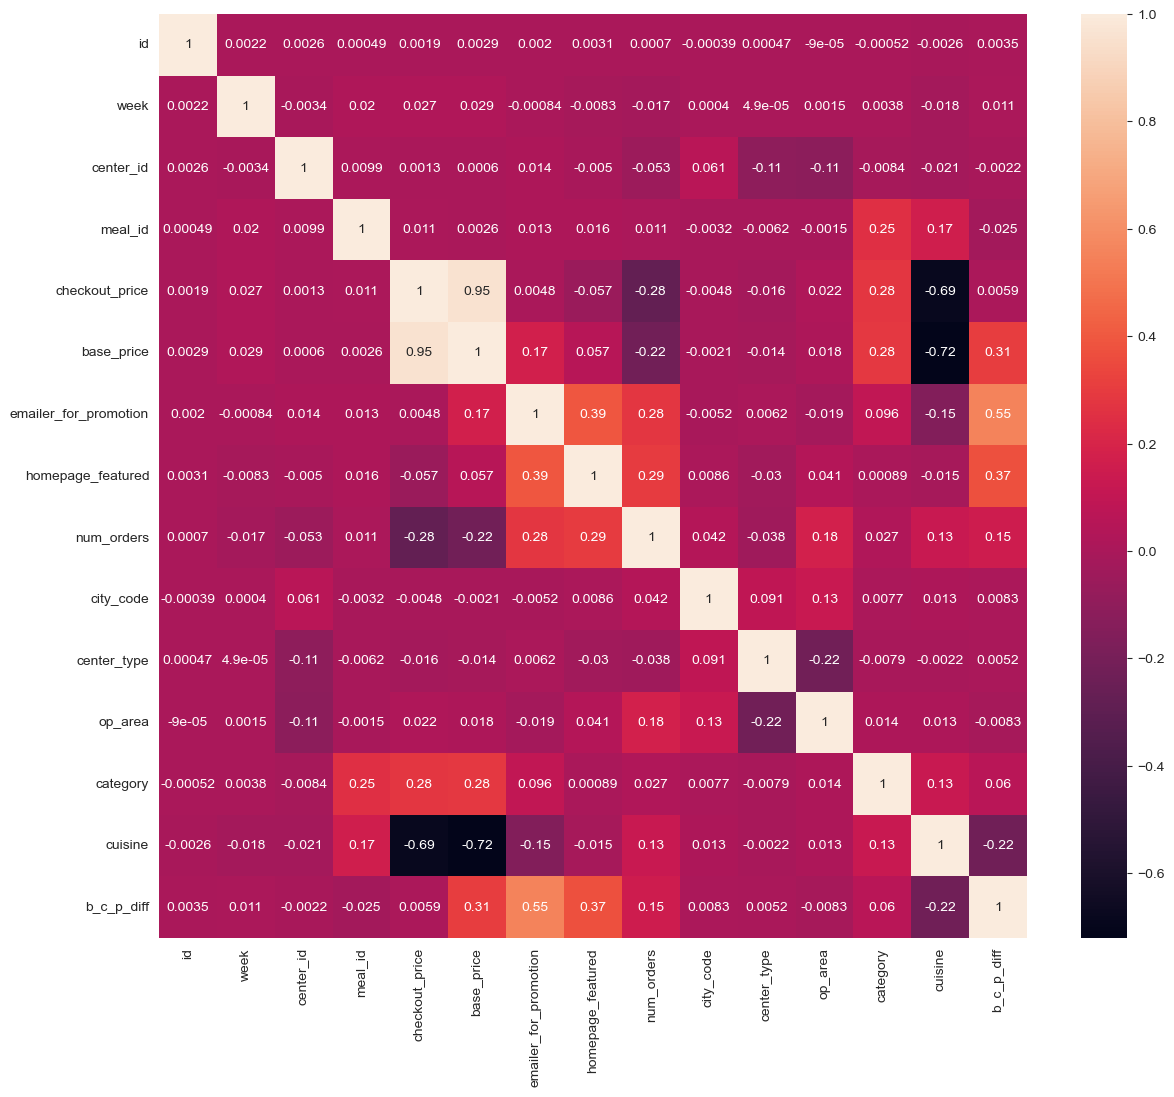

In [81]:
plt.figure(figsize=(14,12))
sns.heatmap(train_df1.corr(),annot=True)

<Axes: >

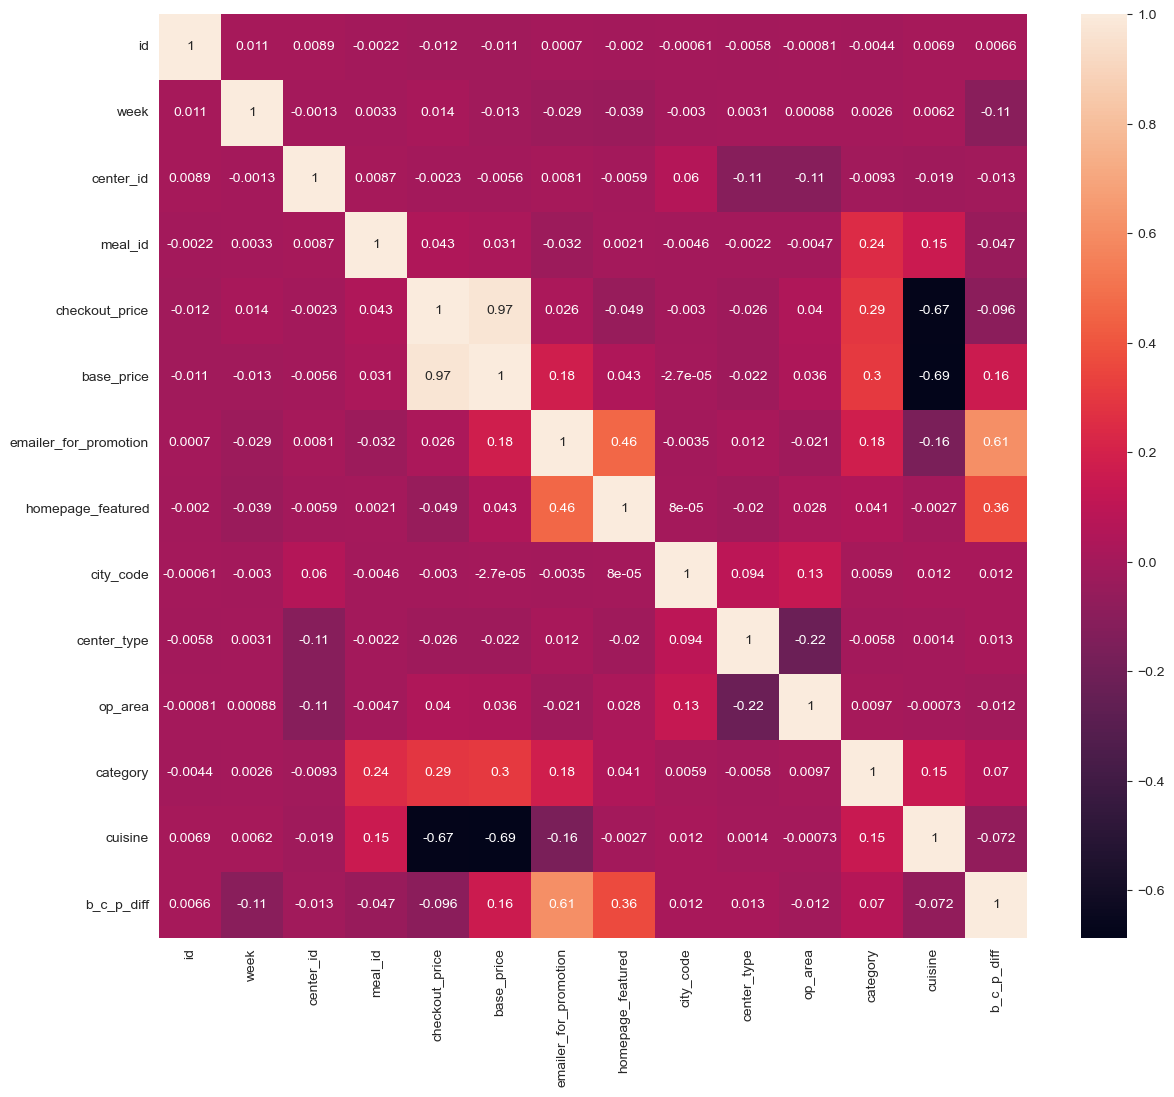

In [82]:
plt.figure(figsize=(14,12))
sns.heatmap(test_df2.corr(),annot=True)

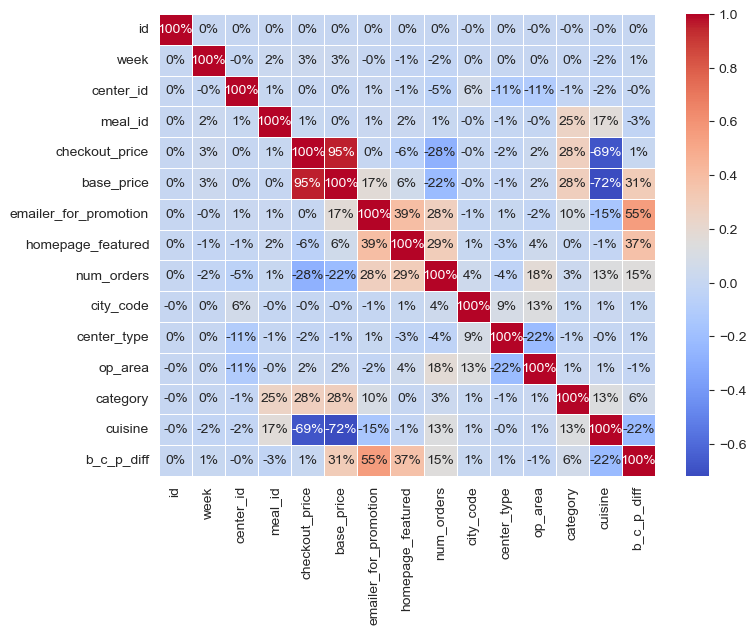

In [83]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(train_df1.corr(), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

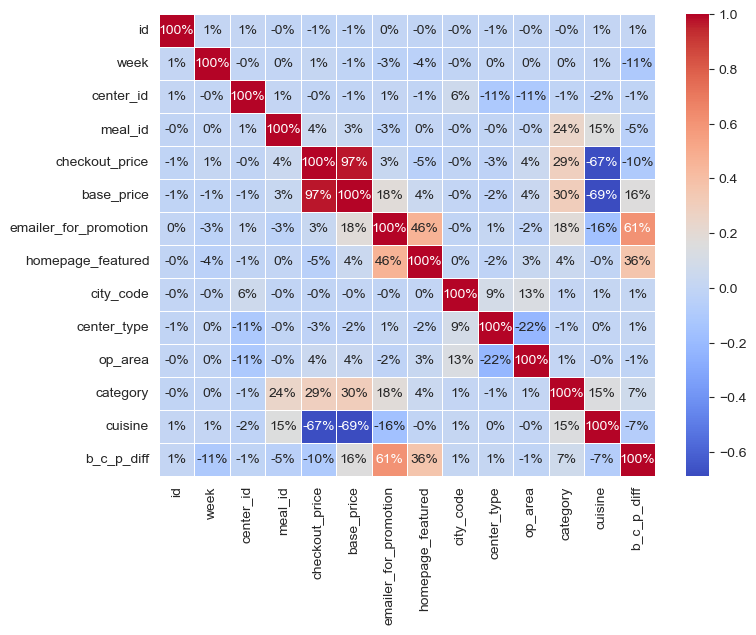

In [84]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(test_df2.corr(), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

In [85]:
# List of columns to drop
columns_to_drop = ['emailer_for_promotion','homepage_featured','city_code', 'region_code', 'op_area','base_price','id']

# Check if columns exist in the DataFrame before attempting to drop them
columns_to_drop = [col for col in columns_to_drop if col in train_df1.columns]

train_df1 = train_df1.drop(columns=columns_to_drop)


In [86]:
# List of columns to drop
columns_to_drop = ['emailer_for_promotion','homepage_featured','city_code', 'region_code', 'op_area','base_price','id']

# Check if columns exist in the DataFrame before attempting to drop them
columns_to_drop = [col for col in columns_to_drop if col in test_df2.columns]

test_df2 = test_df2.drop(columns=columns_to_drop)


In [87]:
train_df1.info


<bound method DataFrame.info of         week  center_id  meal_id  checkout_price  num_orders  center_type  \
0          1         55     1885          136.83         177            2   
1          2         55     1885          135.83         323            2   
2          3         55     1885          132.92          96            2   
3          4         55     1885          135.86         163            2   
4          5         55     1885          146.50         215            2   
...      ...        ...      ...             ...         ...          ...   
456543   141         61     2104          583.03          13            0   
456544   142         61     2104          581.03          42            0   
456545   143         61     2104          583.03          40            0   
456546   144         61     2104          582.03          53            0   
456547   145         61     2104          581.03          27            0   

        category  cuisine  b_c_p_diff  
0  

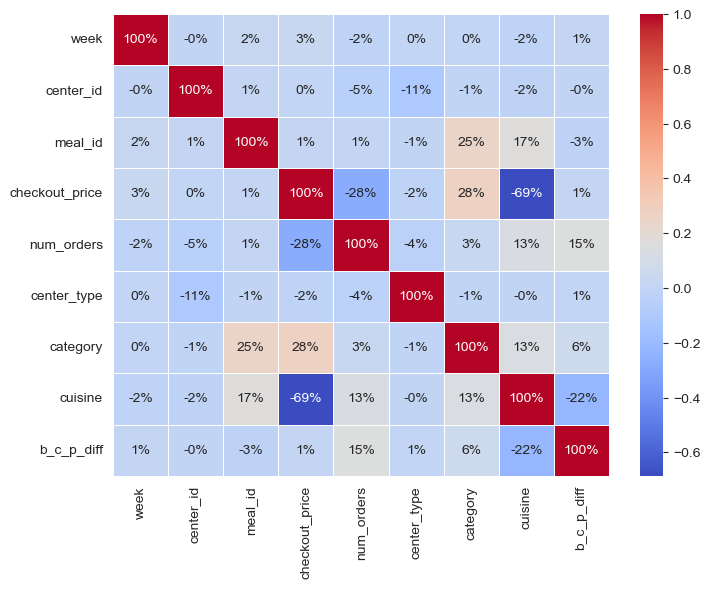

In [88]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(train_df1.corr(), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

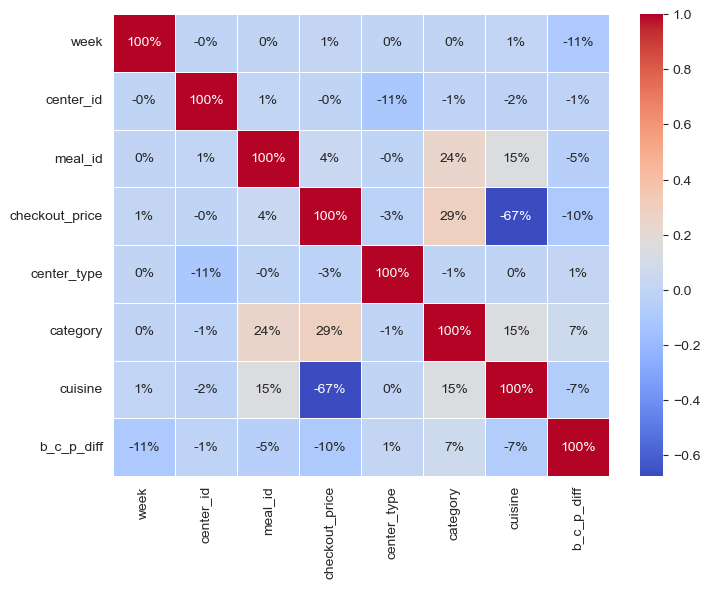

In [89]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(test_df2.corr(), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

In [90]:
!pip install klib

Defaulting to user installation because normal site-packages is not writeable


In [91]:
import klib

In [92]:
klib.cat_plot(train_df1)

No columns with categorical data were detected.


In [93]:
klib.cat_plot(test_df2)

No columns with categorical data were detected.


In [94]:
#correlation matrix
klib.corr_mat(train_df1)

In [95]:
#correlation matrix
klib.corr_mat(test_df2)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

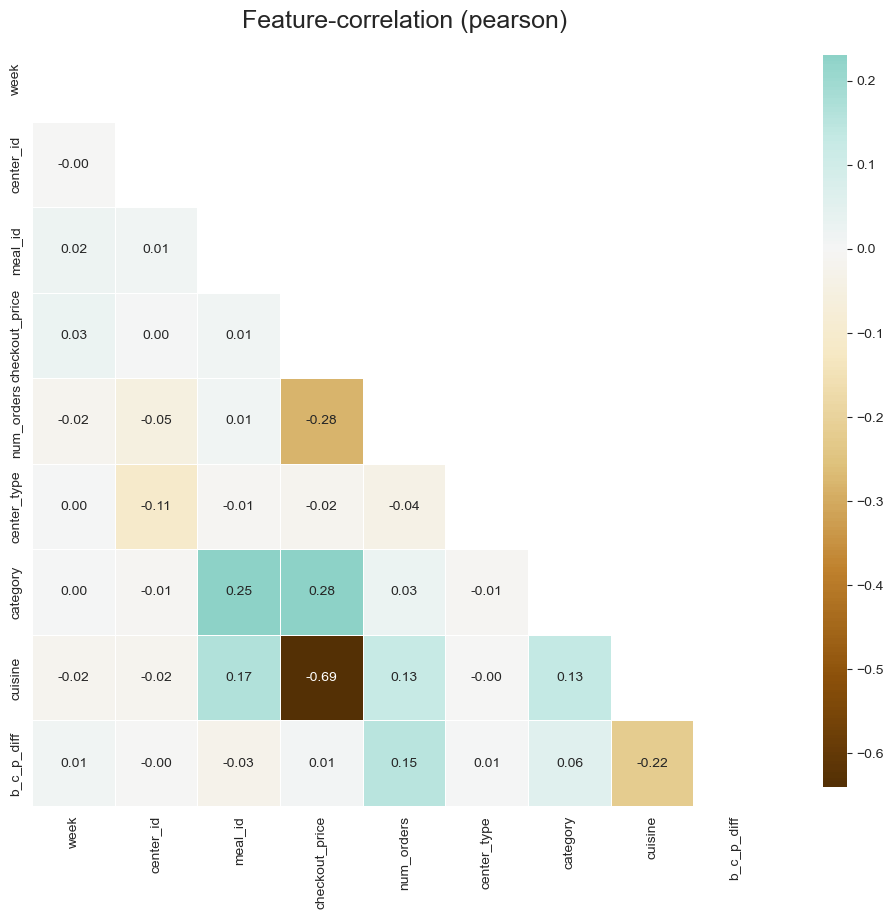

In [96]:
klib.corr_plot(train_df1)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

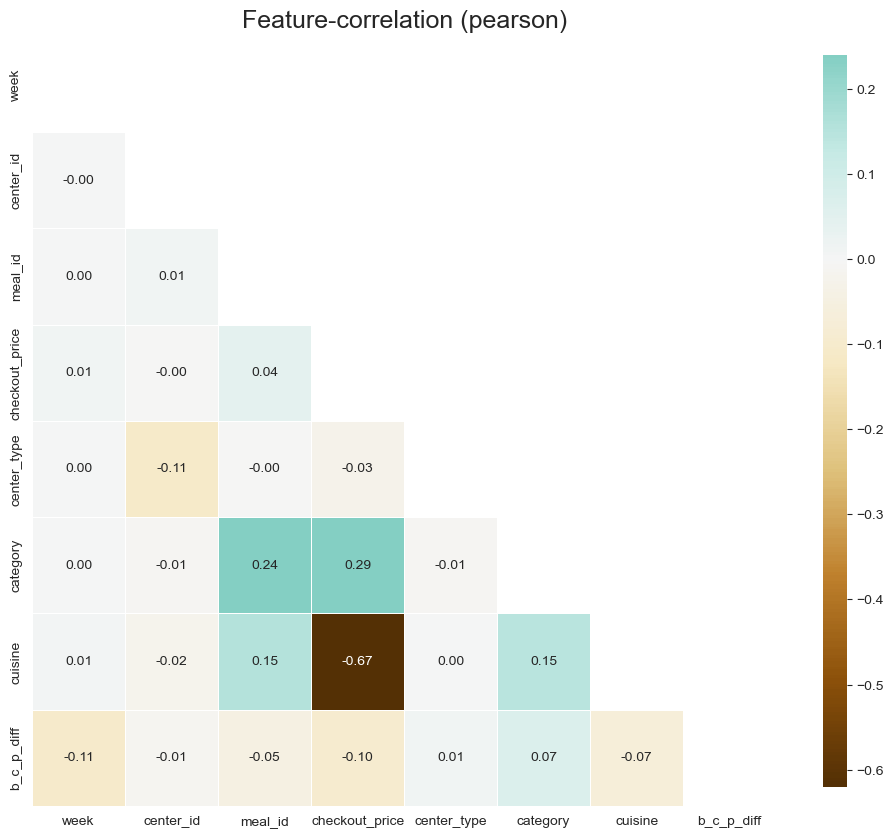

In [97]:
klib.corr_plot(test_df2)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large da

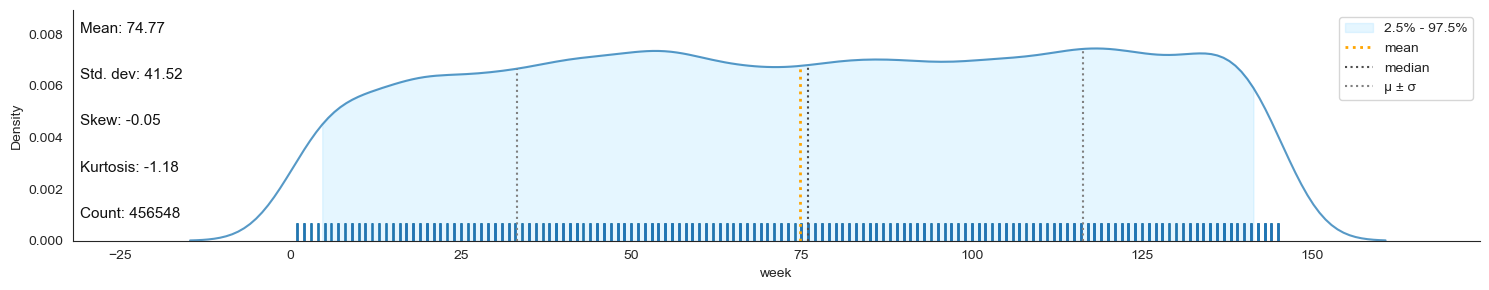

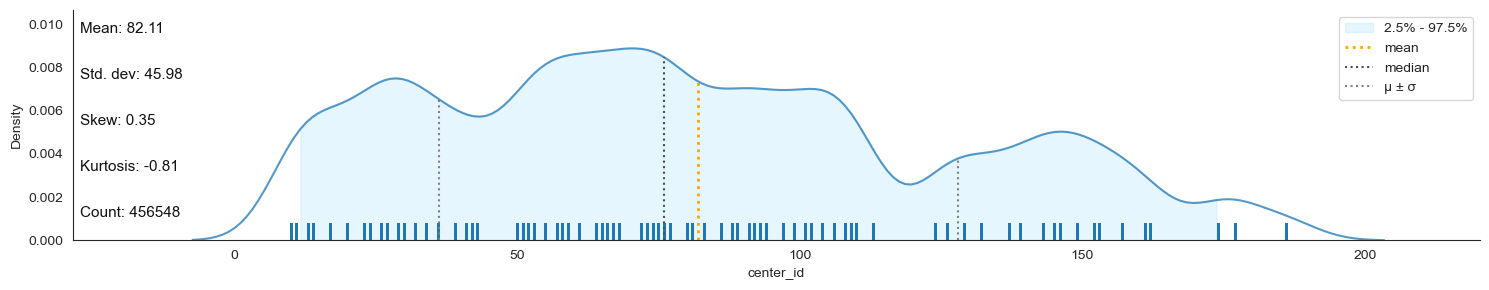

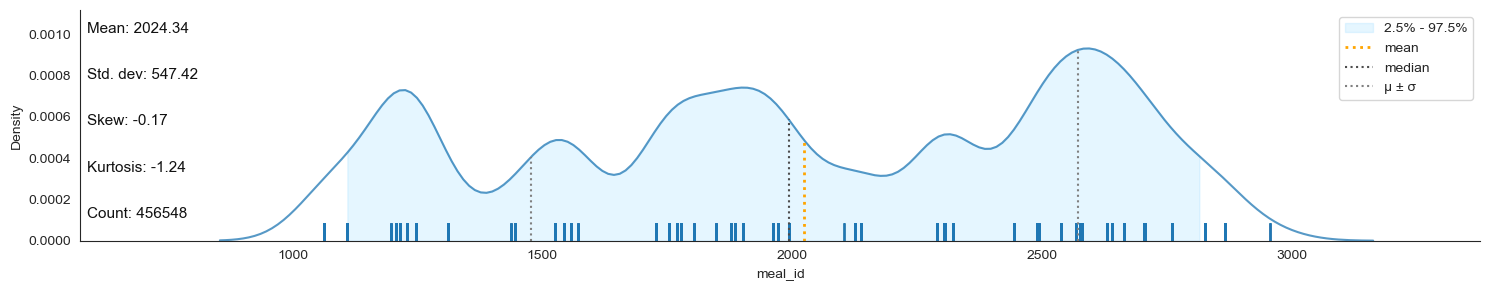

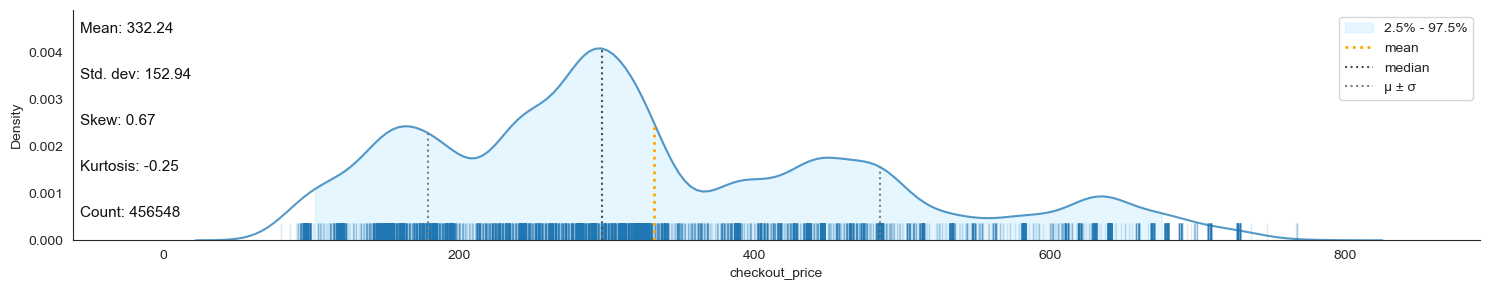

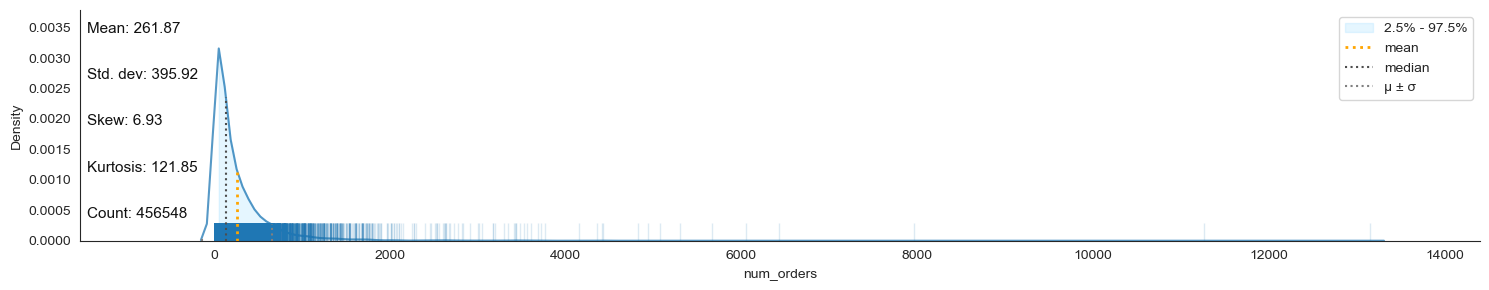

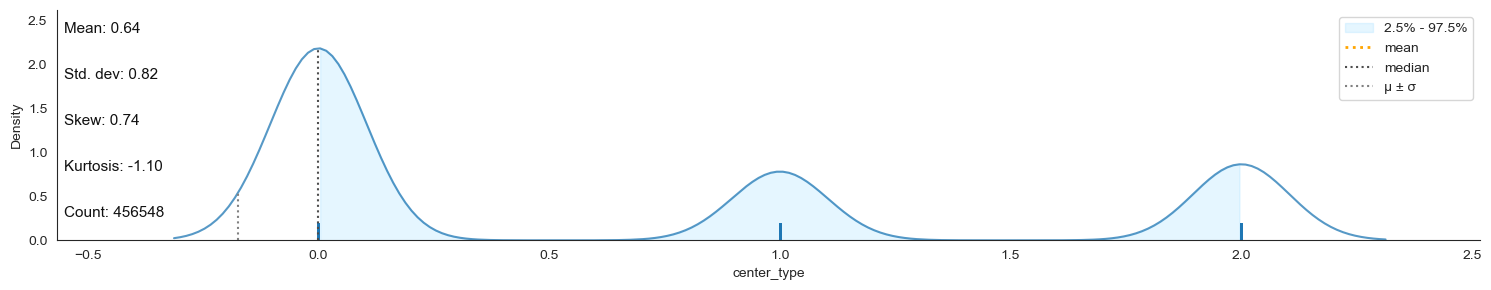

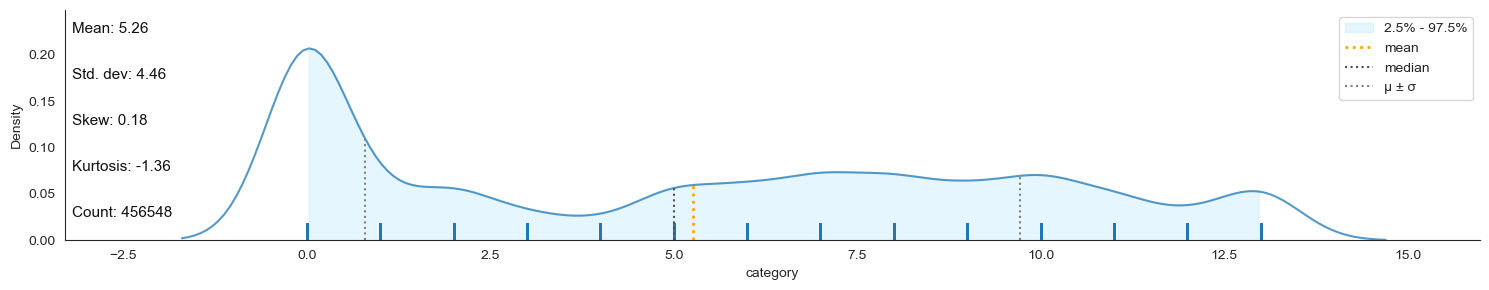

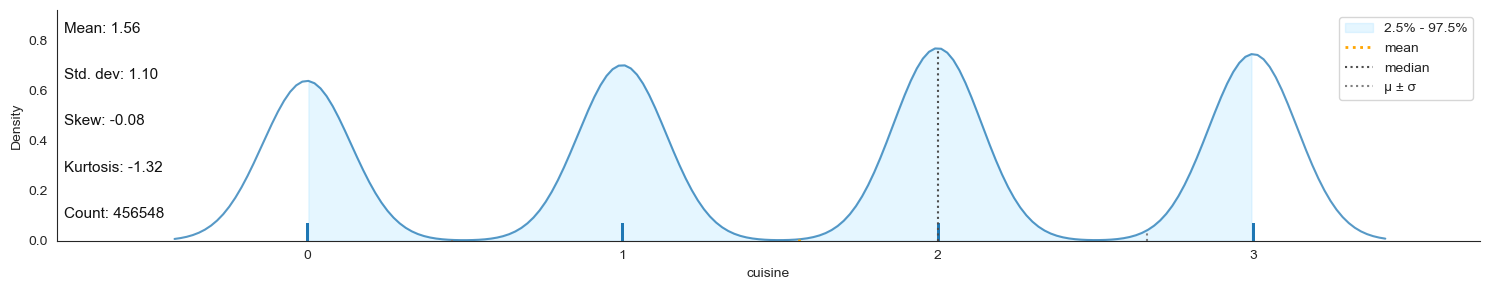

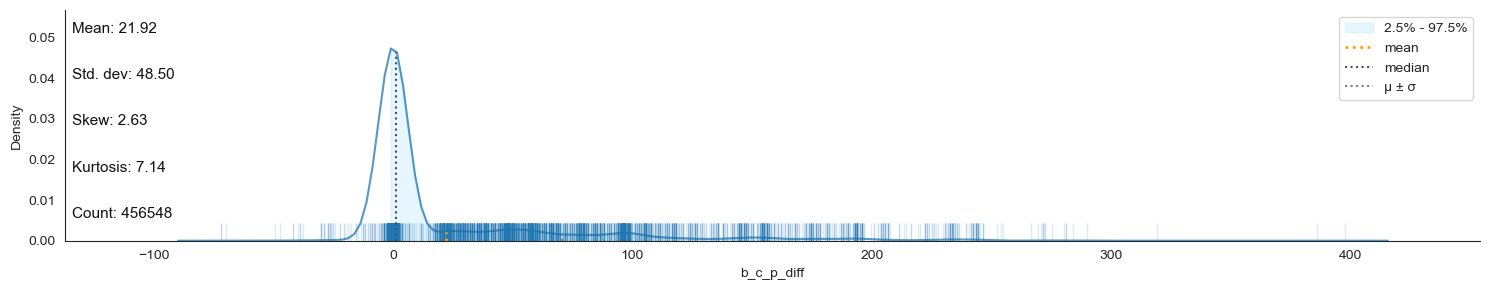

In [98]:
# Get the numeric columns
numeric_columns = train_df1.select_dtypes(include='number').columns

# Create individual distribution plots for each numeric feature
for column in numeric_columns:
    klib.dist_plot(train_df1[column])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


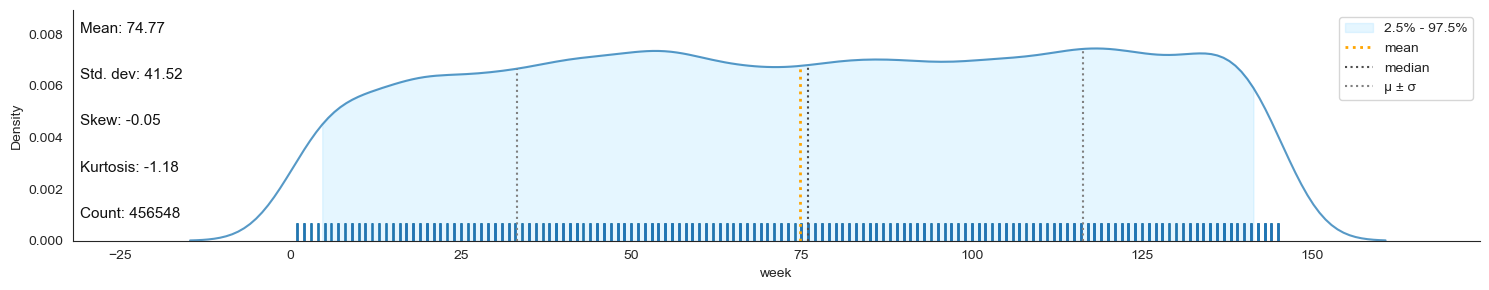

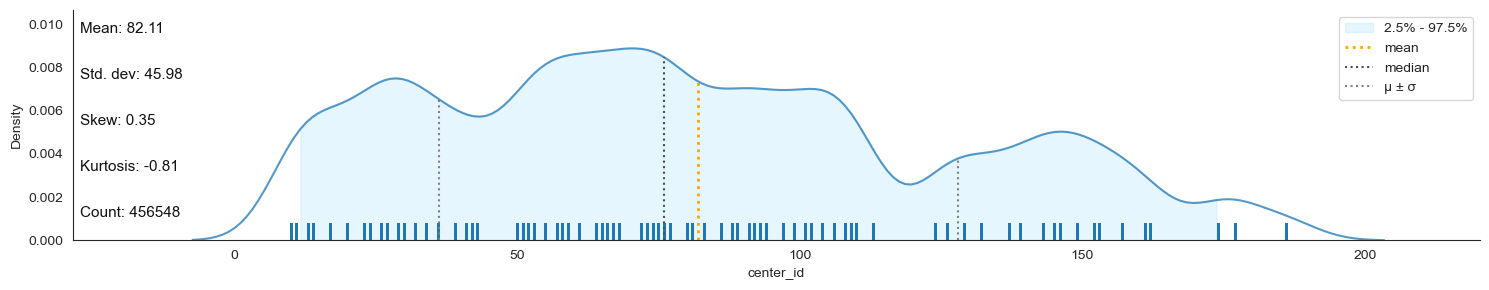

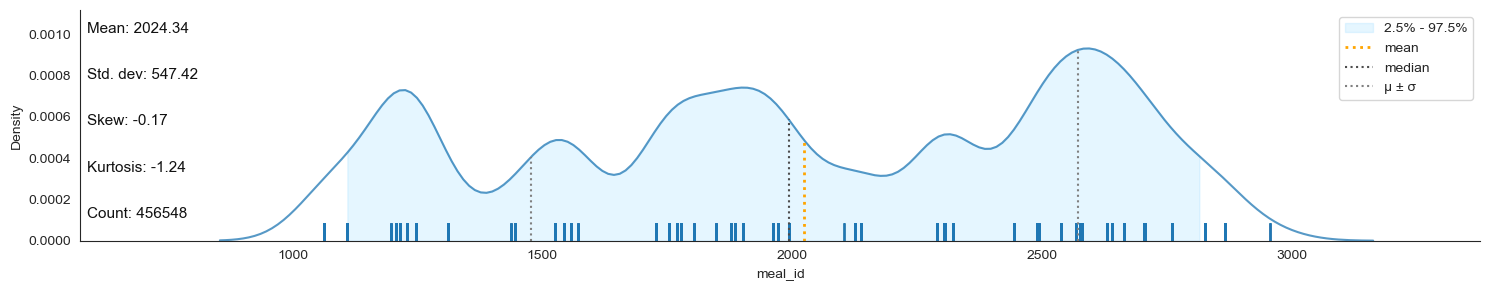

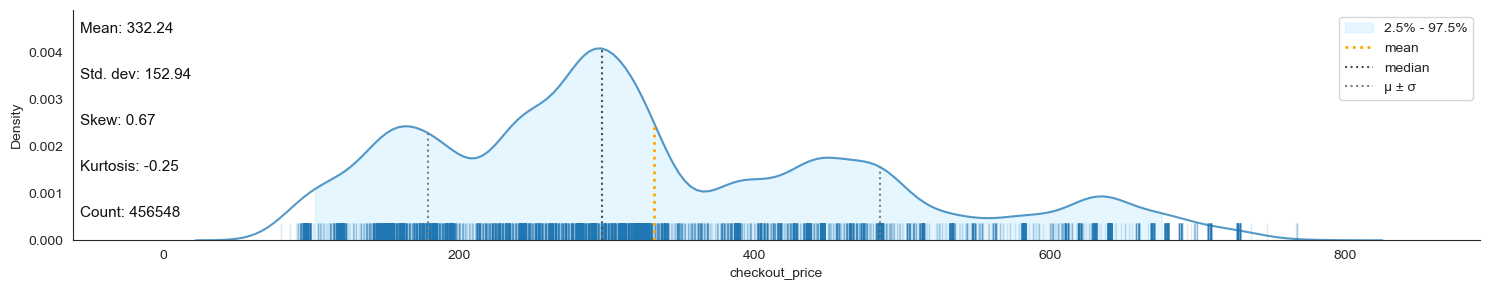

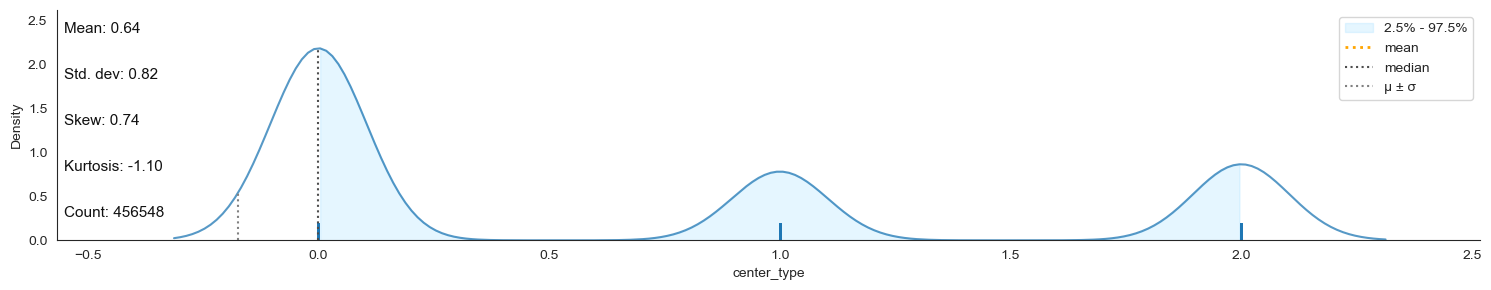

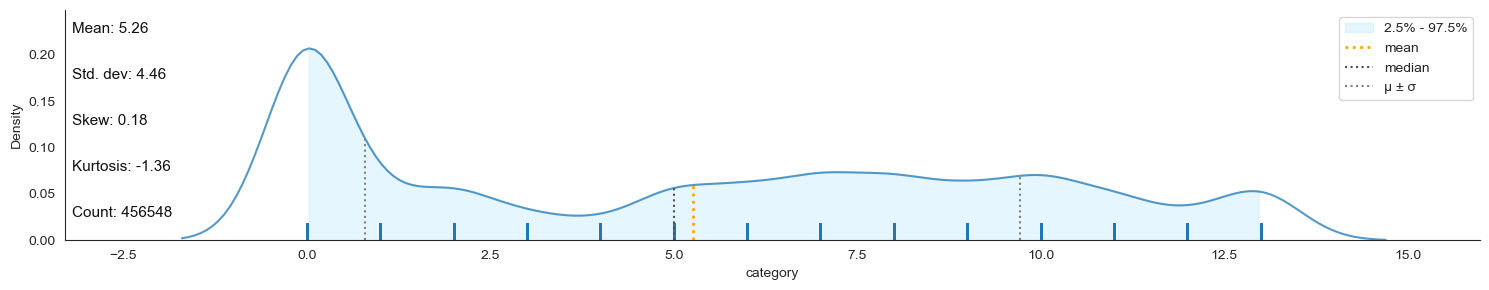

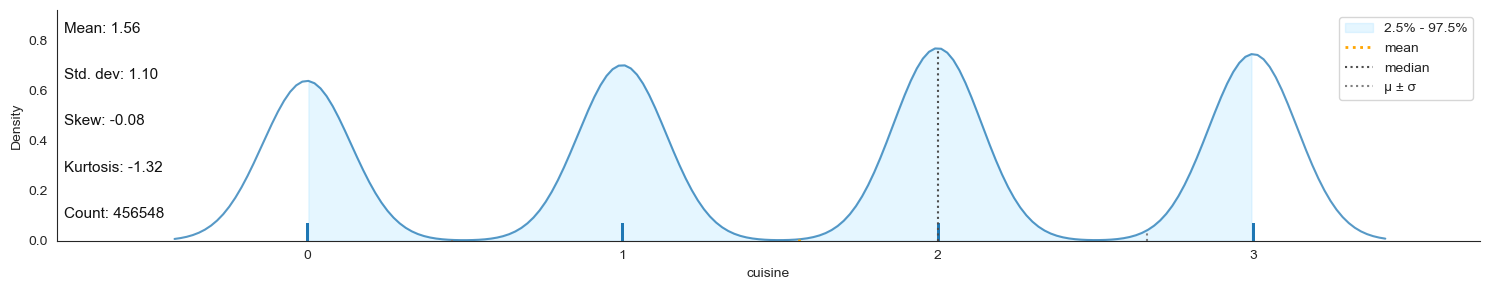

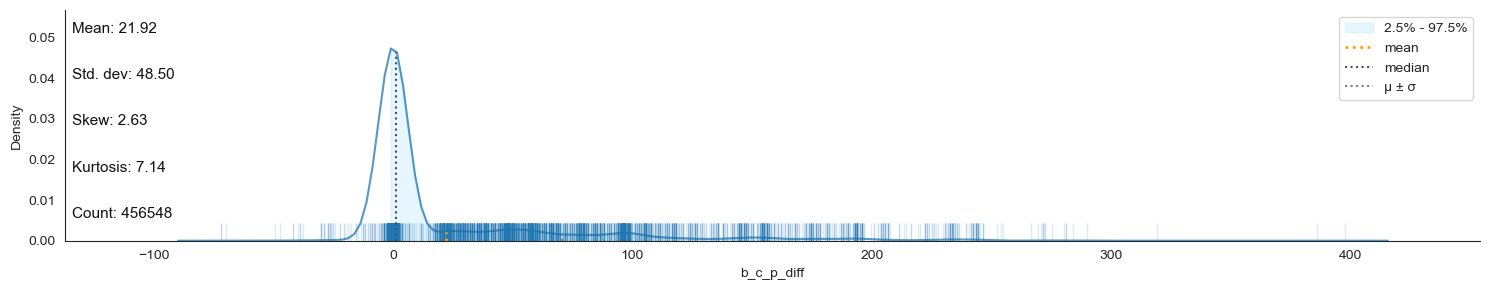

In [99]:
# Get the numeric columns
numeric_columns = test_df2.select_dtypes(include='number').columns

# Create individual distribution plots for each numeric feature
for column in numeric_columns:
    klib.dist_plot(train_df1[column])

In [100]:
klib.missingval_plot(train_df1)

No missing values found in the dataset.


In [101]:
klib.missingval_plot(test_df2)

No missing values found in the dataset.


In [102]:
# klib.clean - functions for cleaning datasets
# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(train_df1) 


Shape of cleaned data: (456548, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 33.54 MB (-73.34%)



week  center_id  meal_id  checkout_price  num_orders  center_type  \
0          1         55     1885      136.830002         177            2   
1          2         55     1885      135.830002         323            2   
2          3         55     1885      132.919998          96            2   
3          4         55     1885      135.860001         163            2   
4          5         55     1885      146.500000         215            2   
...      ...        ...      ...             ...         ...          ...   
456543   141         61     2104      583.030029          13            0   
456544   142         61     2104      581.030029          42            0   
456545   143         61     2104      583.030029          40            0   
456546   144         61     2104      582.030029          53            0   
456547   145         61     2104      581.030029          27            0   

        category  cuisine  b_c_p_diff  
0              0        3   15.460000  
1              0        3   16.459999  
2              0        3    1.000000  
3              0        3   -1.000000  
4              0        3    1.000000  
...          ...      ...         ...  
456543         4        0   47.500000  
456544         4        0    1.000000  
456545         4        0   -2.000000  
456546         4        0   -1.000000  
456547         4        0    1.000000  

[456548 rows x 9 columns]

In [103]:
# klib.clean - functions for cleaning datasets
# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(test_df2) 


Shape of cleaned data: (32573, 8) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 2.06 MB (-71.78%)



week  center_id  meal_id  checkout_price  center_type  category  \
0       146         55     1885      158.110001            2         0   
1       147         55     1885      159.110001            2         0   
2       149         55     1885      157.139999            2         0   
3       150         55     1885      159.139999            2         0   
4       151         55     1885      160.110001            2         0   
...     ...        ...      ...             ...          ...       ...   
32568   146         61     2104      583.030029            0         4   
32569   147         61     2104      582.030029            0         4   
32570   149         61     2104      629.530029            0         4   
32571   150         61     2104      629.530029            0         4   
32572   152         61     2104      630.530029            0         4   

       cuisine  b_c_p_diff  
0            3         1.0  
1            3         0.0  
2            3         1.0  
3            3        -2.0  
4            3        -1.0  
...        ...         ...  
32568        0        -2.0  
32569        0         0.0  
32570        0         0.0  
32571        0         0.0  
32572        0         1.0  

[32573 rows x 8 columns]

In [104]:
# cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(train_df1) 

week  center_id  meal_id  checkout_price  num_orders  center_type  \
0          1         55     1885          136.83         177            2   
1          2         55     1885          135.83         323            2   
2          3         55     1885          132.92          96            2   
3          4         55     1885          135.86         163            2   
4          5         55     1885          146.50         215            2   
...      ...        ...      ...             ...         ...          ...   
456543   141         61     2104          583.03          13            0   
456544   142         61     2104          581.03          42            0   
456545   143         61     2104          583.03          40            0   
456546   144         61     2104          582.03          53            0   
456547   145         61     2104          581.03          27            0   

        category  cuisine  b_c_p_diff  
0              0        3       15.46  
1              0        3       16.46  
2              0        3        1.00  
3              0        3       -1.00  
4              0        3        1.00  
...          ...      ...         ...  
456543         4        0       47.50  
456544         4        0        1.00  
456545         4        0       -2.00  
456546         4        0       -1.00  
456547         4        0        1.00  

[456548 rows x 9 columns]

In [105]:
# cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(test_df2) 

week  center_id  meal_id  checkout_price  center_type  category  \
0       146         55     1885          158.11            2         0   
1       147         55     1885          159.11            2         0   
2       149         55     1885          157.14            2         0   
3       150         55     1885          159.14            2         0   
4       151         55     1885          160.11            2         0   
...     ...        ...      ...             ...          ...       ...   
32568   146         61     2104          583.03            0         4   
32569   147         61     2104          582.03            0         4   
32570   149         61     2104          629.53            0         4   
32571   150         61     2104          629.53            0         4   
32572   152         61     2104          630.53            0         4   

       cuisine  b_c_p_diff  
0            3         1.0  
1            3         0.0  
2            3         1.0  
3            3        -2.0  
4            3        -1.0  
...        ...         ...  
32568        0        -2.0  
32569        0         0.0  
32570        0         0.0  
32571        0         0.0  
32572        0         1.0  

[32573 rows x 8 columns]

In [106]:
# cleans and standardizes column names, also called inside data_cleaning()
train_df1=klib.convert_datatypes(train_df1) 
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   week            456548 non-null  int16  
 1   center_id       456548 non-null  int16  
 2   meal_id         456548 non-null  int16  
 3   checkout_price  456548 non-null  float32
 4   num_orders      456548 non-null  int16  
 5   center_type     456548 non-null  int32  
 6   category        456548 non-null  int32  
 7   cuisine         456548 non-null  int32  
 8   b_c_p_diff      456548 non-null  float32
dtypes: float32(2), int16(4), int32(3)
memory usage: 31.8 MB


In [107]:
# cleans and standardizes column names, also called inside data_cleaning()
test_df2=klib.convert_datatypes(test_df2) 
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week            32573 non-null  int16  
 1   center_id       32573 non-null  int16  
 2   meal_id         32573 non-null  int16  
 3   checkout_price  32573 non-null  float32
 4   center_type     32573 non-null  int32  
 5   category        32573 non-null  int32  
 6   cuisine         32573 non-null  int32  
 7   b_c_p_diff      32573 non-null  float32
dtypes: float32(2), int16(3), int32(3)
memory usage: 2.1 MB


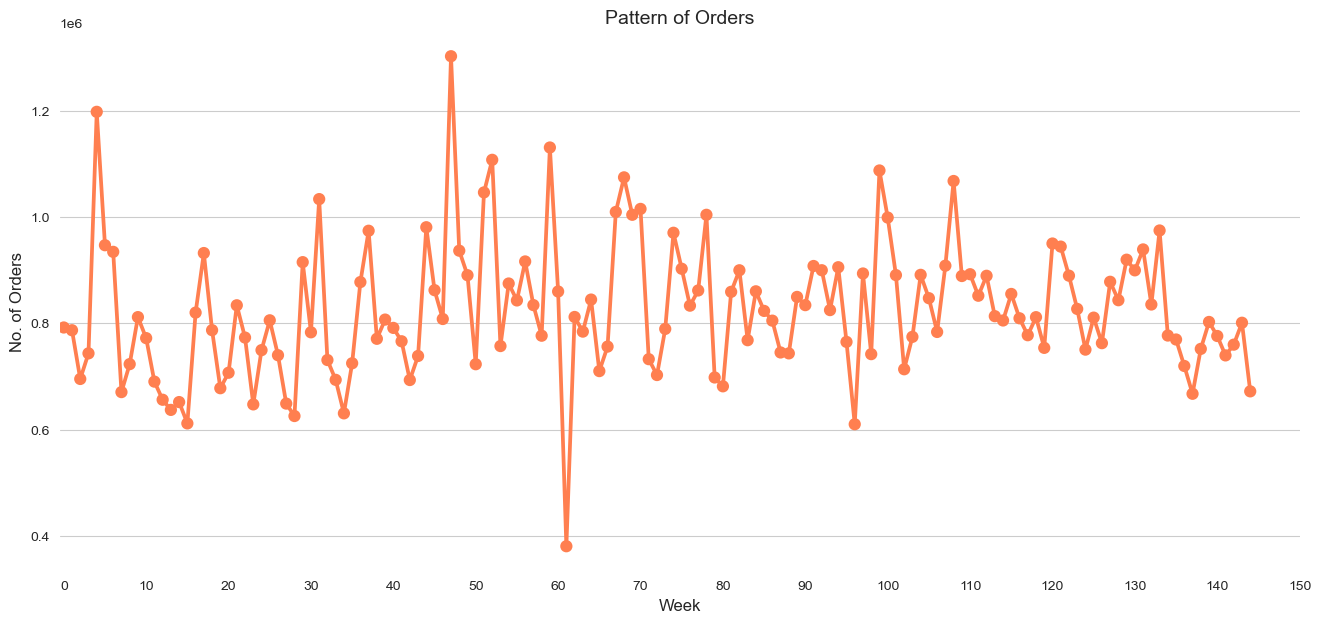

In [111]:
fig = plt.figure(figsize=(16, 7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders', fontdict={'fontsize': 14})

# Use the number of weeks to determine the ticks and labels
weeks = np.arange(0, 160, 10)
sns.pointplot(x=train_df1.groupby('week').sum().reset_index()['week'],
              y=train_df1.groupby('week').sum().reset_index()['num_orders'],
              color='coral')

plt.xticks(weeks, list(map(str, weeks)))  # Convert numbers to strings for labels
plt.ylabel('No. of Orders', fontdict={'fontsize': 12})
plt.xlabel('Week', fontdict={'fontsize': 12})
sns.despine(bottom=True, left=True);


When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

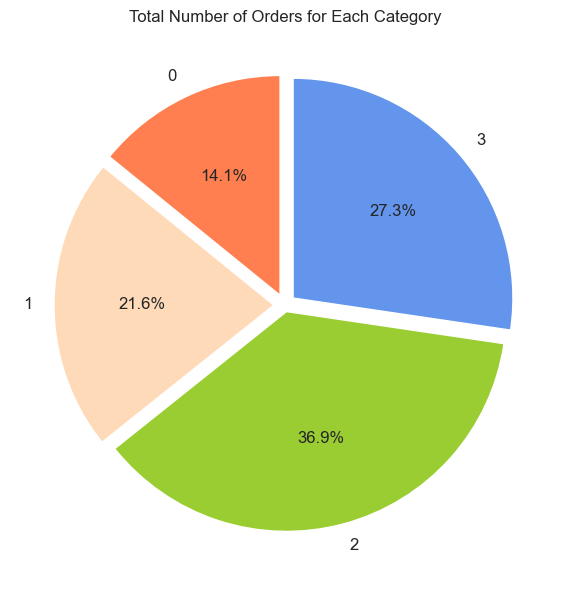

In [112]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train_df1.groupby(['cuisine']).num_orders.sum(),
    labels=train_df1.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

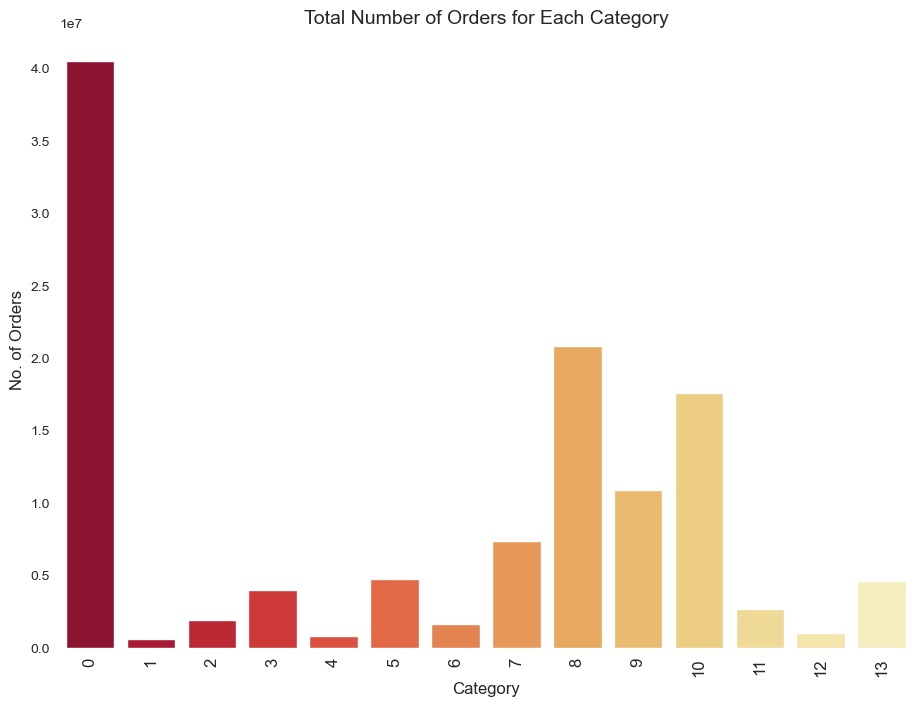

In [113]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train_df1.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
